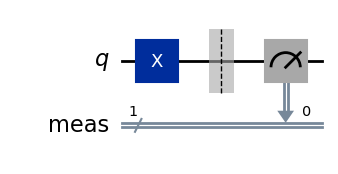

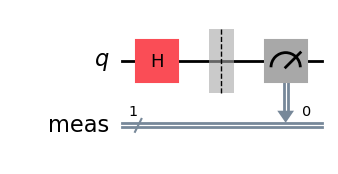

The number of bitstrings for qc_1 is: 10240
The counts for qc_1 are: {'1': 10240}
The number of bitstrings for qc_plus is: 10240
The counts for qc_plus are: {'1': 5134, '0': 5106}


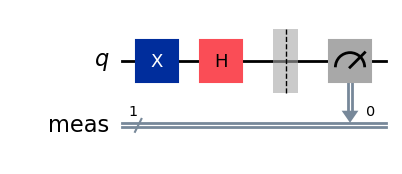

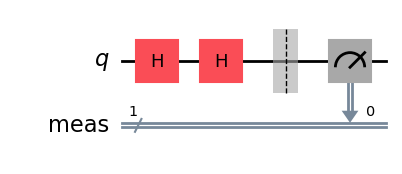

The number of bitstrings for qc_1 is: 1024
The counts for qc_1 are: {'0': 498, '1': 526}
The number of bitstrings for qc_plus is: 1024
The counts for qc_plus are: {'0': 1024}


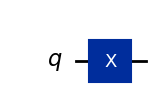

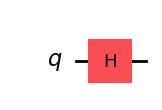

    |   <Z>   |   <X> 
----|-------------------------------
|1> | -1.0    | 0.0
|+> |  0.0    | 0.9999999999999998


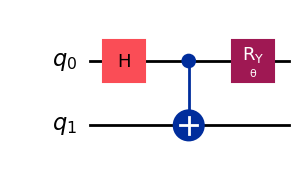

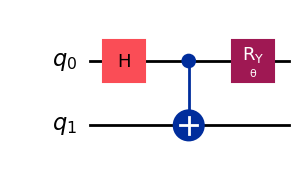

θ = 0.00 => CHSH value: 2.00
θ = 0.08 => CHSH value: 2.16
θ = 0.17 => CHSH value: 2.30
θ = 0.25 => CHSH value: 2.43
θ = 0.33 => CHSH value: 2.54
θ = 0.41 => CHSH value: 2.63
θ = 0.50 => CHSH value: 2.71
θ = 0.58 => CHSH value: 2.77
θ = 0.66 => CHSH value: 2.81
θ = 0.74 => CHSH value: 2.83
θ = 0.83 => CHSH value: 2.83
θ = 0.91 => CHSH value: 2.81
θ = 0.99 => CHSH value: 2.77
θ = 1.07 => CHSH value: 2.71
θ = 1.16 => CHSH value: 2.63
θ = 1.24 => CHSH value: 2.54
θ = 1.32 => CHSH value: 2.43
θ = 1.41 => CHSH value: 2.30
θ = 1.49 => CHSH value: 2.16
θ = 1.57 => CHSH value: 2.00
θ = 3.14 => CHSH value: -2.00
θ = 3.22 => CHSH value: -2.16
θ = 3.31 => CHSH value: -2.30
θ = 3.39 => CHSH value: -2.43
θ = 3.47 => CHSH value: -2.54
θ = 3.55 => CHSH value: -2.63
θ = 3.64 => CHSH value: -2.71
θ = 3.72 => CHSH value: -2.77
θ = 3.80 => CHSH value: -2.81
θ = 3.89 => CHSH value: -2.83
θ = 3.97 => CHSH value: -2.83
θ = 4.05 => CHSH value: -2.81
θ = 4.13 => CHSH value: -2.77
θ = 4.22 => CHSH value: -2.71


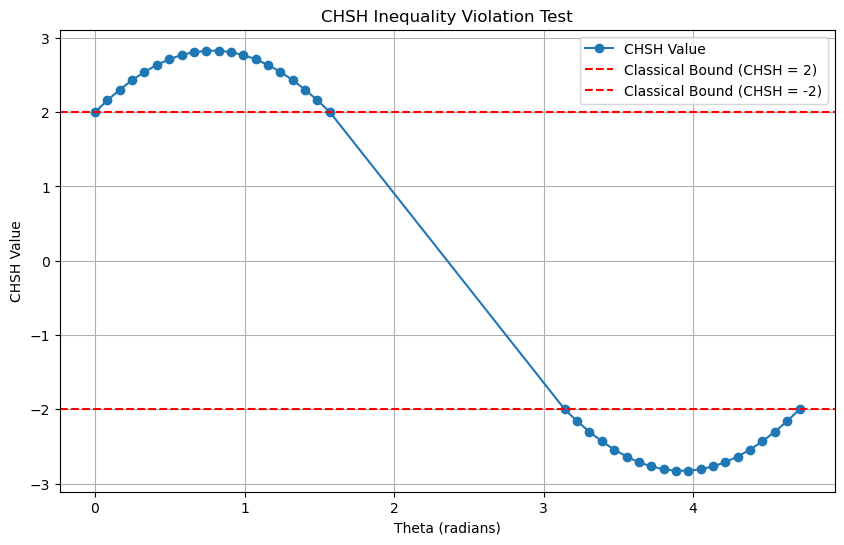

Number of violations of CHSH inequality: 18


In [1]:
from qiskit.circuit import QuantumCircuit
from qiskit.primitives import StatevectorEstimator, StatevectorSampler
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.circuit.library import HGate, CXGate
from IPython.display import display, Latex
from qiskit.circuit import Parameter
from qiskit.circuit import ClassicalRegister, QuantumRegister


"""PART 1 """




qc_1 = QuantumCircuit(1)
qc_1.x(0)
qc_1.measure_all() 


# draw the quantum circuit implementing
display(qc_1.draw(output='mpl', reverse_bits=True))
qc_plus = QuantumCircuit(1) # Creates quantum circuit 1 qubit

# apply a Hadamard gate to first qubit, then measure all qubits
qc_plus.h(0)
qc_plus.measure_all()

# draw the quantum circuit implementing
display(qc_plus.draw(output = "mpl", reverse_bits=True))

"""
Sampler: Samples quantum states produced by circuits (classically simulated in this case).
Job: Runs a collection of experiments (multiple circuits) and specifies how many times (shots) each circuit is executed.
Shots: Defines how many times the circuit is run to gather statistical measurement data.
Storing Data: Results from each circuit are stored (bitstrings represent outcomes of measurements).
Bitstrings: The possible outcomes (e.g., 00, 01, etc.) from the measurements of the qubits. The number of bits to specify the results of our collection of experiments into a single string
Counts: The number of times each bitstring is observed over the total runs (shots).
Final Output: Displays the number of bitstrings, their counts, and the total number of experiments (shots). """

# create a Sampler object
sampler = StatevectorSampler()

# create a job for the quantum circuit implementing
job = sampler.run([qc_1, qc_plus], shots=10240)
result = job.result()
# Access result data for PUB 1 and PUB plus PUB: (Primitive Unified Blocs)
data_pub_1 = result[0].data
data_pub_plus = result[1].data
# Access bitstring for the classical register "meas"
bitstrings_1 = data_pub_1.meas.get_bitstrings()
print(f"The number of bitstrings for qc_1 is: {len(bitstrings_1)}")
# Get counts for the classical register "meas"
counts_1 = data_pub_1.meas.get_counts()
print(f"The counts for qc_1 are: {counts_1}")

bitstrings_plus = data_pub_plus.meas.get_bitstrings()
print(f"The number of bitstrings for qc_plus is: {len(bitstrings_plus)}")
counts_plus = data_pub_plus.meas.get_counts()
print(f"The counts for qc_plus are: {counts_plus}")

"""MEASUREMENT WRT X"""
# Qc1 performs measurement on |1> in z basis
# Now QC1 performs measurement on |1> which is in superposition of |+> and |-> in xbasis by conversion to x via hadamard
qc_1.remove_final_measurements()
qc_1.h(0)
qc_1.measure_all()
display(qc_1.draw(output = "mpl", reverse_bits=True))

# QC plus initially performed measurement on 1 in xbasis, now we convert back to z basis and perform measurement in wrt z
qc_plus.remove_final_measurements()
qc_plus.h(0)

qc_plus.measure_all()
display(qc_plus.draw(output = "mpl", reverse_bits=True))


# create a Sampler object
sampler = StatevectorSampler()

# create a job for the quantum circuit implementing
# an excited state |1>, running the Sampler
job = sampler.run([qc_1, qc_plus], shots=1024)
result = job.result()

# Access result data for PUB 1 and PUB plus PUB: (Primitive Unified Blocs)
data_pub_1 = result[0].data
data_pub_plus = result[1].data
# Access bitstring for the classical register "meas"
bitstrings_1 = data_pub_1.meas.get_bitstrings()
print(f"The number of bitstrings for qc_1 is: {len(bitstrings_1)}")
# Get counts for the classical register "meas"
counts_1 = data_pub_1.meas.get_counts()
print(f"The counts for qc_1 are: {counts_1}")

bitstrings_plus = data_pub_plus.meas.get_bitstrings()
print(f"The number of bitstrings for qc_plus is: {len(bitstrings_plus)}")
counts_plus = data_pub_plus.meas.get_counts()
print(f"The counts for qc_plus are: {counts_plus}")


"""EStimator Primitive - Abstraction of Measurements"""


qc2_1 = QuantumCircuit(1)
qc2_1.x(0)


qc2_plus = QuantumCircuit(1)
qc2_plus.h(0)
""" This creates a list of Pauli operators (observables) that will be used to compute the expectation values for both quantum circuits. """
obsvs = list(SparsePauliOp( [ "Z", "X" ] ))

display(qc2_1.draw(output = "mpl", reverse_bits=True))
display(qc2_plus.draw(output = "mpl", reverse_bits=True))

# crate an Estimator object

"""StatevectorEstimator is an Estimator Primitive that evaluates the expectation values of observables for given quantum states.
The estimator object is created to run the circuits and calculate the expectation values of the defined observables."""
estimator = StatevectorEstimator()

# create a job for the quantum circuit implementing
# an excited state |1>, running the Estimator

"""Job Execution: The estimator.run() method executes the two circuits (qc2_1 and qc2_plus) along with the defined observables (obsvs).
The first circuit (qc2_1) prepares the 
∣1⟩ state and computes the expectation values of the Z and X Pauli observables.
The second circuit (qc2_plus) prepares the ∣+⟩ state and computes the expectation values of the same observables (Z and X).
Results: The result object stores the calculated expectation values for both circuits and observables.
"""


job2 = estimator.run([(qc2_1, obsvs), (qc2_plus,obsvs)])
result = job2.result()

# print a table with results (and eigenvalues) for
# the quantum states created before and measured in the bases set before
print(f'    |   <Z>   |   <X> ')
print(f'----|-------------------------------')
print(f'|1> | {result[0].data.evs[0]}    | {result[0].data.evs[1]}')
print(f'|+> |  {result[1].data.evs[0]}    | {result[1].data.evs[1]}')


# create the Sparse Pauli operator ZZ, for <AB>
ZZ = SparsePauliOp.from_list( [ ( "ZZ", 1 ) ] )

# create the Sparse Pauli operator ZX, for <Ab>
ZX = SparsePauliOp.from_list( [ ( "ZX", 1 ) ] )

# create the Sparse Pauli operator XZ, for <aB>
XZ = SparsePauliOp.from_list( [ ( "XZ", 1 ) ] )

# create the Sparse Pauli operator XX, for <ab>
XX = SparsePauliOp.from_list( [ ( "XX", 1 ) ] )


# create the list of required
# operators ZZ, ZX, XZ, and XX
ops = [ ZZ, ZX, XZ, XX ]

obsv = ( ops[0] + ops[1] - ops[2] + ops[3] )



# create a parameter for the theta angle
theta = Parameter("θ")

qc = QuantumCircuit(2)



qc.h(0)
qc.cx(0, 1)
qc.ry(theta, 0)
display(qc.draw(output = "mpl", reverse_bits=False))


# CHSH witness operator (second one)
CHSH_observable = ( ops[0] + ops[1] - ops[2] + ops[3] )

# Define the Statevector Estimator
estimator = StatevectorEstimator()

# Parameterize theta angles to test
number_of_phases = 20
phases_chsh_2_1 = np.linspace(0, 0.5 * np.pi, number_of_phases)
phases_chsh_2_2 = np.linspace(np.pi, 1.5 * np.pi, number_of_phases)
angles = [[ph] for ph in phases_chsh_2_1] + [[ph] for ph in phases_chsh_2_2]








# Create a parameterized circuit for Alice and Bob
theta = Parameter('θ')
qc = QuantumCircuit(2)

# Create the Bell state
qc.h(0)  # Hadamard gate on qubit 0
qc.cx(0, 1)  # CNOT gate to create entanglement
qc.ry(theta, 0)  # Alice's qubit (0)

display(qc.draw(output="mpl", reverse_bits=False))

# Test for violation of the CHSH inequality
results = []
for angle in angles:
    # Assign the current angle to theta
    circuit_with_theta = qc.assign_parameters({theta: angle[0]})
    
    # Run the estimator with a circuit-observable pair
    job = estimator.run([(circuit_with_theta, CHSH_observable)])
    result = job.result()
    
    # Access the expectation value from result[0].data.evs
    expectation_value = result[0].data.evs  # Extract the expectation value
    
    results.append(expectation_value)  # Append the numerical value to the list
    print(f'θ = {angle[0]:.2f} => CHSH value: {expectation_value:.2f}')

# Plot the results
plt.figure(figsize=(10, 6))
theta_values = [angle[0] for angle in angles]
plt.plot(theta_values, results, label="CHSH Value", marker='o')
plt.axhline(2, color='r', linestyle='--', label="Classical Bound (CHSH = 2)")
plt.axhline(-2, color='r', linestyle='--', label="Classical Bound (CHSH = -2)")
plt.xlabel("Theta (radians)")
plt.ylabel("CHSH Value")
plt.title("CHSH Inequality Violation Test")
plt.legend()
plt.grid(True)
plt.show()

# Check how many violations of the CHSH inequality (expectation value > 2)
violations = [value for value in results if value > 2]
print(f'Number of violations of CHSH inequality: {len(violations)}')



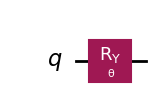

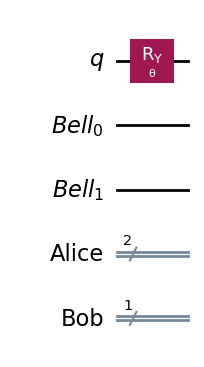

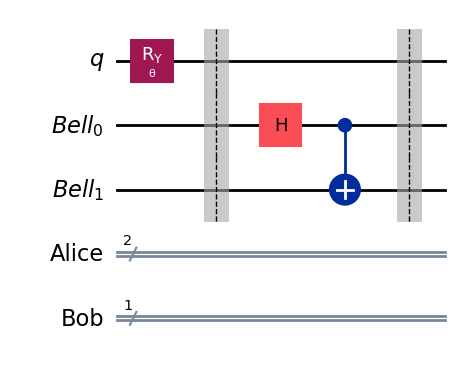

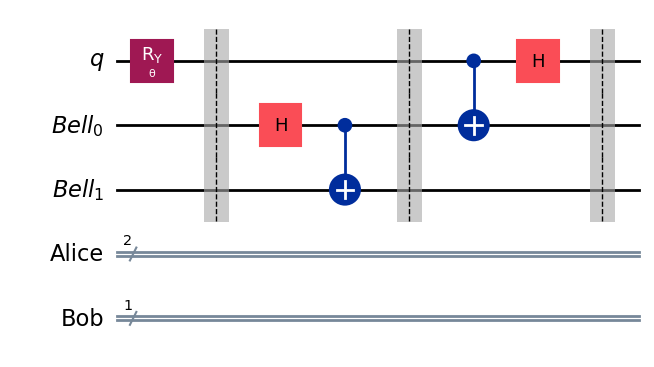

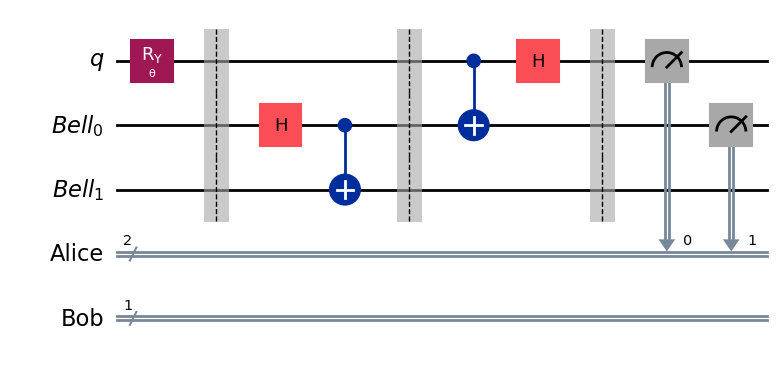

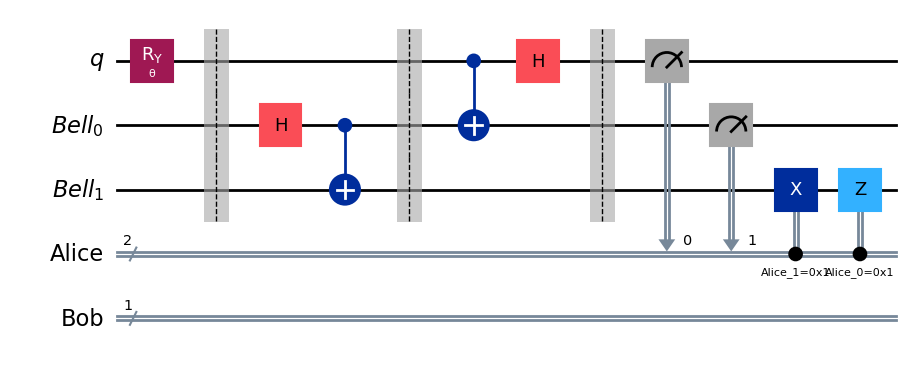

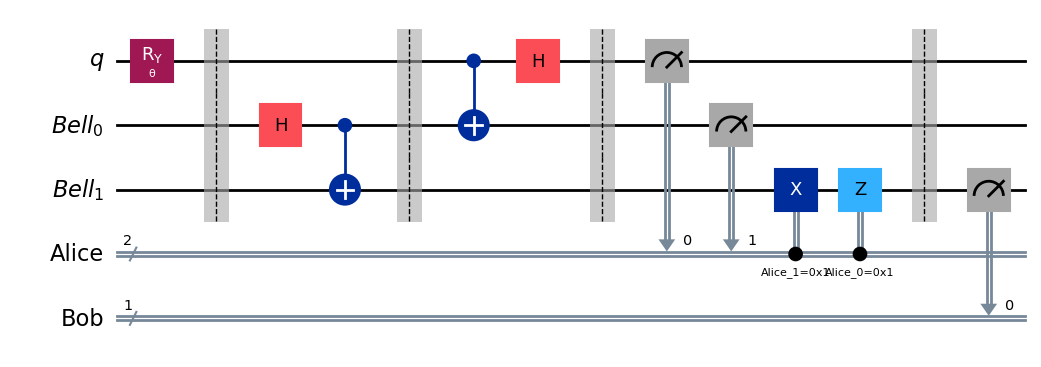

Original Dists.: {'1': 0.810546875, '0': 0.189453125}
Teleported Dists.: {'001': 0.048828125, '011': 0.046875, '101': 0.19140625, '100': 0.19921875, '111': 0.2119140625, '110': 0.2138671875, '000': 0.0517578125, '010': 0.0361328125}


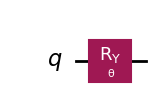

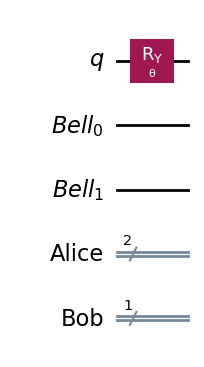

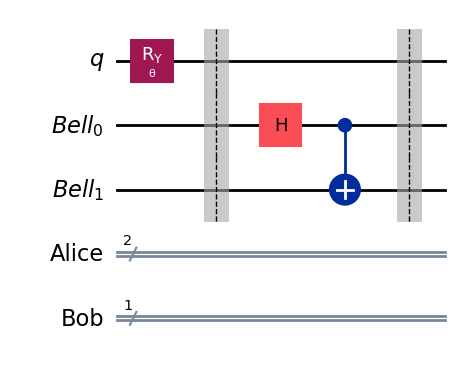

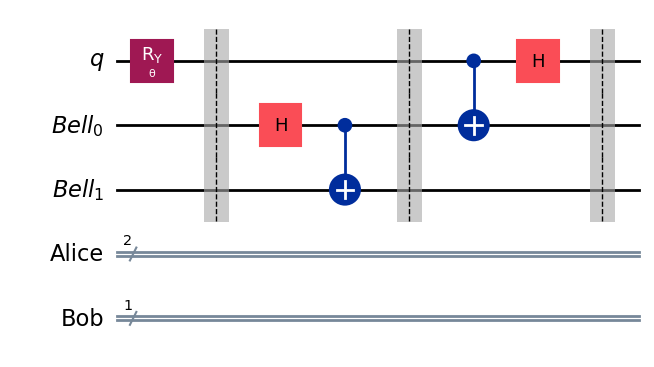

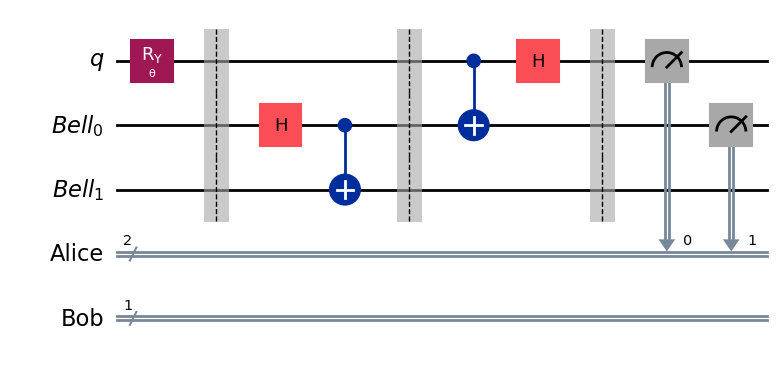

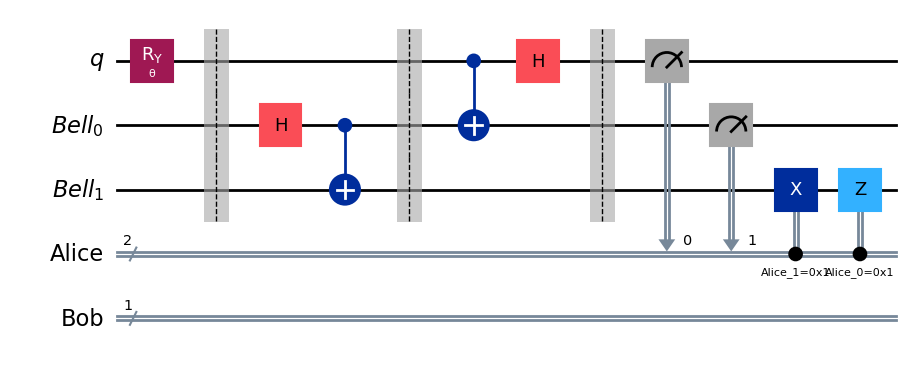

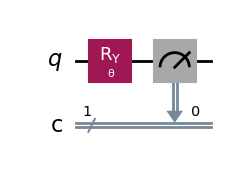

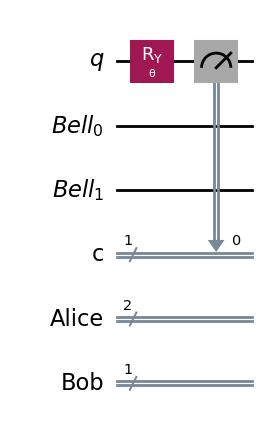

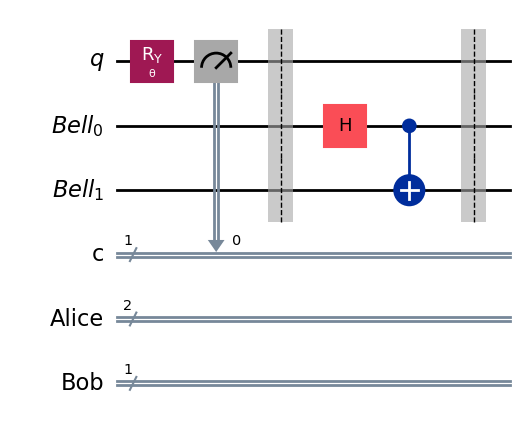

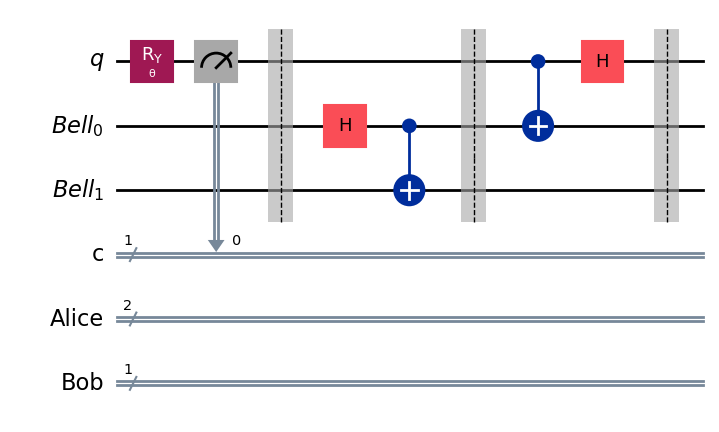

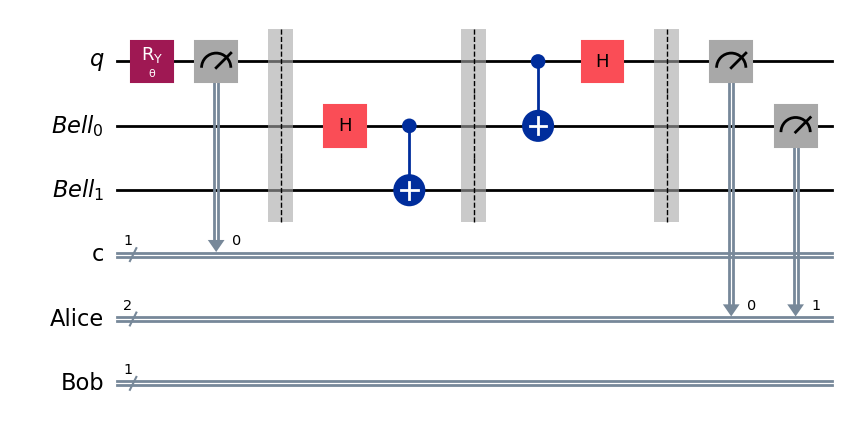

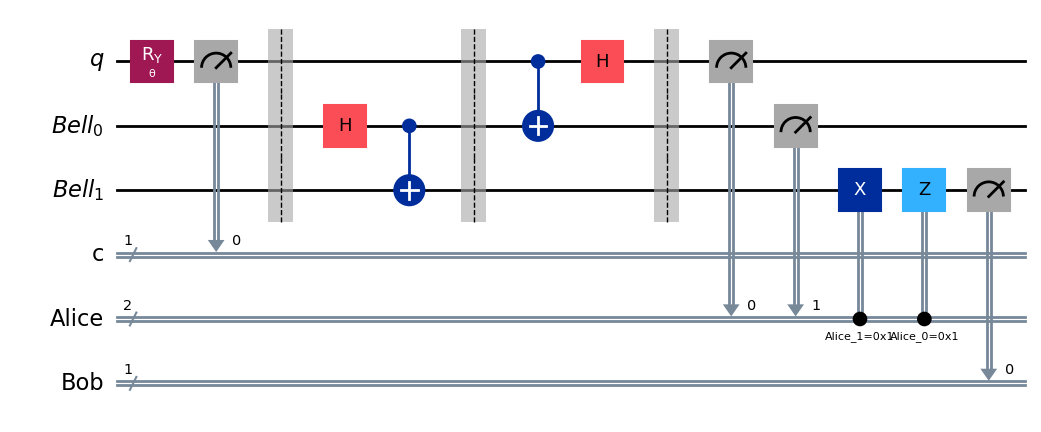

Full counts (static circuit):
{'0': 0.861328125, '1': 0.138671875}
Full counts (dynamic circuit):
{'1011': 0.033203125, '0010': 0.19921875, '0000': 0.22265625, '1111': 0.02734375, '0110': 0.21484375, '1101': 0.03515625, '0100': 0.2255859375, '1001': 0.0419921875}
Marginalized counts (static circuit, Bob's qubit):
{'0': 0.861328125, '1': 0.138671875}
Marginalized counts (dynamic circuit, Bob's qubit):
{'1': 0.1376953125, '0': 0.8623046875}


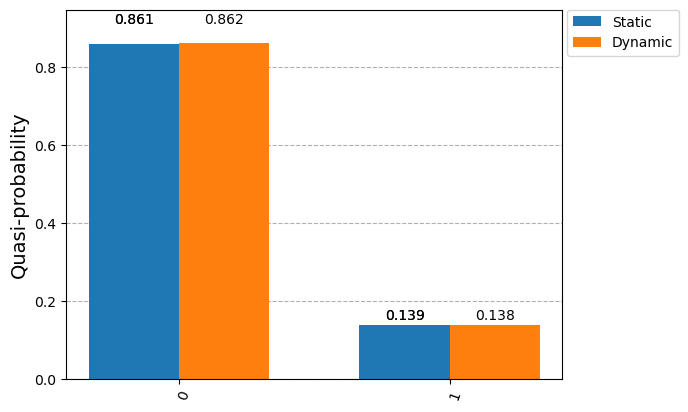

In [201]:
from qiskit.circuit import QuantumCircuit
from qiskit.primitives import StatevectorEstimator, StatevectorSampler
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.circuit.library import HGate, CXGate
from IPython.display import display, Latex
from qiskit.circuit import Parameter
from qiskit.circuit import ClassicalRegister, QuantumRegister
from qiskit_aer.primitives import Sampler
from qiskit.result import marginal_counts


"""Part 2"""


# create a parameter for the theta angle
theta = Parameter("θ")
# create a quantum register for one qubit and to implement a parametrized quantum operation
qr = QuantumRegister(1, "q")

# create a quantum circuit with the quantum register created before
qc = QuantumCircuit(qr)

# apply a RY (Rotation-Y)
qc.ry(theta, 0)

display(qc.draw(output = "mpl", reverse_bits=False))


tele_qc = qc.copy()


# create a quantum register with two qubits
# for the Bell State to be shared on
bell = QuantumRegister(2, "Bell")
alice = ClassicalRegister(2, "Alice")
bob = ClassicalRegister(1, "Bob")


tele_qc.add_register(bell, alice, bob)
display(tele_qc.draw(output = "mpl", reverse_bits=False))

tele_qc.barrier()
tele_qc.h(1)
tele_qc.cx(1, 2)
tele_qc.barrier()
display(tele_qc.draw(output = "mpl", reverse_bits=False))


tele_qc.cx(0, 1)
tele_qc.h(0)
tele_qc.barrier()
display(tele_qc.draw(output = "mpl", reverse_bits=False))

tele_qc.measure( [ qr[0], bell[0] ], alice )
display(tele_qc.draw(output = "mpl", reverse_bits=False))


# create a copy of the quantum circuit defined before
# to initialize the quantum circuit implementing
# a parametrized quantum teleportation,
# and to be graded with dynamic operations 
graded_qc = tele_qc.copy()


##############################

# add gates to graded_qc here

# Bob, who already has the qubit teleported,
# applies the following gates depending on
# the state of the classical bits:
# 00 -> Do nothing
# 01 -> Apply X gate
# 10 -> Apply Z gate
# 11 -> Apply ZX gate

# apply the Pauli-X (bit flip / not) gate on
# the 2nd qubit of the Bell state if
# the Alice's 2nd classical bit is 1
graded_qc.x( bell[1] ).c_if( alice[1], 1 )

# apply the Pauli-Z (phase flip) gate on
# the 2nd qubit of the Bell state if
# the Alice's 1st classical bit is 1
graded_qc.z( bell[1] ).c_if( alice[0], 1 )

##############################


# draw the quantum circuit implementing
# the parametrized quantum teleportation, to be graded
display(graded_qc.draw(output = "mpl", reverse_bits=False))

graded_qc.barrier()

graded_qc.measure( bell[1], bob )


display(graded_qc.draw(output = "mpl", reverse_bits=False))

# impor the Sampler from the IBM's Qiskit
# Aer primitives module
from qiskit_aer.primitives import Sampler


# define the pretended theta angle
angle = 5 * ( np.pi / 7 ) 


# create a Sampler object
sampler = Sampler()


# measure all the qubits on the quantum circuit
# implementing a parametrized quantum teleportation
qc.measure_all()


# create a job for the quantum circuit implementing
# a parametrized quantum teleportation,
# with a static quantum circuit and
# with the theta angle defined before
job_static = sampler.run( qc.assign_parameters({theta: angle}) )

# create a job for the quantum circuit implementing
# a parametrized quantum teleportation,
# with a dynamic quantum circuit and
# with the theta angle defined before
job_dynamic = sampler.run( graded_qc.assign_parameters({theta: angle}) )


# print the measurement distributions of the qubits from
# the parametrized quantum teleportation, with a static quantum circuit
print( f"Original Dists.: {job_static.result().quasi_dists[0].binary_probabilities()}" )

# print the measurement distributions of the qubits from
# the parametrized quantum teleportation, with a dynamic quantum circuit
print( f"Teleported Dists.: {job_dynamic.result().quasi_dists[0].binary_probabilities()}" )


theta = Parameter("θ")

# Create a quantum register for one qubit and implement a parametrized quantum operation
qr = QuantumRegister(1, "q")

# Create a quantum circuit with the quantum register created before
qc = QuantumCircuit(qr)

# Apply a RY (Rotation-Y) gate with the parameter theta
qc.ry(theta, 0)

display(qc.draw(output="mpl", reverse_bits=False))

# Copy the quantum circuit for teleportation
tele_qc = qc.copy()

# Create quantum and classical registers for Bell state, Alice, and Bob
bell = QuantumRegister(2, "Bell")
alice = ClassicalRegister(2, "Alice")
bob = ClassicalRegister(1, "Bob")

# Add the Bell, Alice, and Bob registers to the teleportation circuit
tele_qc.add_register(bell, alice, bob)
display(tele_qc.draw(output="mpl", reverse_bits=False))

# Create Bell state
tele_qc.barrier()
tele_qc.h(1)
tele_qc.cx(1, 2)
tele_qc.barrier()
display(tele_qc.draw(output="mpl", reverse_bits=False))

# Alice's operations
tele_qc.cx(0, 1)
tele_qc.h(0)
tele_qc.barrier()
display(tele_qc.draw(output="mpl", reverse_bits=False))

# Measure Alice's qubits and store results in Alice's classical register
tele_qc.measure([qr[0], bell[0]], alice)
display(tele_qc.draw(output="mpl", reverse_bits=False))

# Create a copy of the quantum circuit for graded quantum teleportation
graded_qc = tele_qc.copy()

# Add Bob's conditional operations based on Alice's measurements
graded_qc.x(bell[1]).c_if(alice[1], 1)
graded_qc.z(bell[1]).c_if(alice[0], 1)

# Final graded teleportation circuit
display(graded_qc.draw(output="mpl", reverse_bits=False))

# Create a parameter for the theta angle
theta = Parameter("θ")

# Create a quantum register for one qubit and a classical register to store the measurement
qr = QuantumRegister(1, "q")
cr = ClassicalRegister(1, "c")

# Create a quantum circuit with the quantum register and classical register created before
qc = QuantumCircuit(qr, cr)

# Apply a RY (Rotation-Y) gate with the parameter theta
qc.ry(theta, 0)

# Measure the qubit and store the result in the classical register
qc.measure(0, 0)

display(qc.draw(output="mpl", reverse_bits=False))

# Copy the quantum circuit for teleportation
tele_qc = qc.copy()

# Create quantum and classical registers for Bell state, Alice, and Bob
bell = QuantumRegister(2, "Bell")
alice = ClassicalRegister(2, "Alice")
bob = ClassicalRegister(1, "Bob")

# Add the Bell, Alice, and Bob registers to the teleportation circuit
tele_qc.add_register(bell, alice, bob)
display(tele_qc.draw(output="mpl", reverse_bits=False))

# Create Bell state
tele_qc.barrier()
tele_qc.h(1)
tele_qc.cx(1, 2)
tele_qc.barrier()
display(tele_qc.draw(output="mpl", reverse_bits=False))

# Alice's operations
tele_qc.cx(0, 1)
tele_qc.h(0)
tele_qc.barrier()
display(tele_qc.draw(output="mpl", reverse_bits=False))

# Measure Alice's qubits and store results in Alice's classical register
tele_qc.measure([qr[0], bell[0]], alice)
display(tele_qc.draw(output="mpl", reverse_bits=False))

# Create a copy of the quantum circuit for graded quantum teleportation
graded_qc = tele_qc.copy()

# Add Bob's conditional operations based on Alice's measurements
graded_qc.x(bell[1]).c_if(alice[1], 1)
graded_qc.z(bell[1]).c_if(alice[0], 1)

# Measure Bob's qubit and store the result in Bob's classical register
graded_qc.measure(bell[1], bob)

# Final graded teleportation circuit
display(graded_qc.draw(output="mpl", reverse_bits=False))

##############################
# Use the Sampler to run the circuits

# Create the Sampler primitive
sampler = Sampler()

# Assign a specific value to the parameter theta
angle = np.pi / 4  # Example angle value

# Bind the parameter and run the sampler for both circuits
qc.assign_parameters({theta: angle}, inplace=True)
graded_qc.assign_parameters({theta: angle}, inplace=True)

# Sample the static and dynamic circuits
job_static = sampler.run([qc])
job_dynamic = sampler.run([graded_qc])

# Get the quasi-probabilities for both jobs
result_static = job_static.result().quasi_dists[0].binary_probabilities()
result_dynamic = job_dynamic.result().quasi_dists[0].binary_probabilities()

# Display the full counts from both circuits
print("Full counts (static circuit):")
print(result_static)

print("Full counts (dynamic circuit):")
print(result_dynamic)

# Marginalize the counts to focus only on Bob's qubit (least significant bit in little-endian)
marginalized_static = marginal_counts(result_static, indices=[0])
marginalized_dynamic = marginal_counts(result_dynamic, indices=[0])

# Display the marginalized counts
print("Marginalized counts (static circuit, Bob's qubit):")
print(marginalized_static)

print("Marginalized counts (dynamic circuit, Bob's qubit):")
print(marginalized_dynamic)

# Plot the results
plot_histogram([marginalized_static, marginalized_dynamic], legend=["Static", "Dynamic"])